# Businss Understanding

## Business Objective

## Data Sources

## Background Info - King County

- King County, Seattle Washington Wiki: https://en.wikipedia.org/wiki/King_County,_Washington
- The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. 
- King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
- About two-thirds of King County's population lives in Seattle's suburbs.
- King County has a total area of 2,307 square miles (5,980 km2), of which 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.
- The highest point in the county is Mount Daniel at 7,959 feet (2,426 meters) above sea level.

### King County Map

![King County Seattle Map](images/King_County_Map.png)

## Executive Summary

# Data Engineering

## Import Libraries

In [1]:
# Import libraries required to load, transform, analyze and plot data
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
import math
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from haversine import haversine

# Set display option to remove scientific notation and restrictions on df rows/columns display
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
# Add jupytertheme to this notebook for better readability
!jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

## King County Housing Data

### KC Data Dictionary

**Data Dictionary Kings County Data Set**
 - id - unique identified for a house
 - dateDate - house was sold
 - pricePrice -  is prediction target
 - bedroomsNumber -  of Bedrooms/House
 - bathroomsNumber -  of bathrooms/bedrooms
 - sqft_livingsquare -  footage of the home
 - sqft_lotsquare -  footage of the lot
 - floorsTotal -  floors (levels) in house
 - waterfront - House which has a view to a waterfront
 - view - An index from 0 to 4 of how good the view of the property was
 - condition - How good the condition is ( Overall )
 - grade - overall grade given to the housing unit, based on King County grading system
 - sqft_above - square footage of house apart from basement
 - sqft_basement - square footage of the basement
 - yr_built - Built Year
 - yr_renovated - Year when house was renovated
 - zipcode - zip
 - lat - Latitude coordinate
 - long - Longitude coordinate
 - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
 - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


<a href="https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx">King County Condition and Building Grade Scoring</a>

**Condition: Relative to Age and Grade**
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.

**Residential Building Grades**
- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries. 

### Dataframe Basics

#### Load File

In [2]:
# Load Kings County data set (primary driver dataframe)
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


#### Info/Describe

In [ ]:
kc.info()

**Notes**
- Non-nulls look really good, most fields don't have issues
- Only waterfront and year renovated have significant nulls, view has a few. Fill with 0's on all. Change year renovated to int64.
- Change zipcode to string
- Why is sqft_basement an object?

#### Data Cleaning

In [ ]:
kc.iloc[15855:15857]

In [ ]:
# Check Waterfront value distribution - only 146 have view.
kc.waterfront.value_counts()

In [3]:
# Fill nulls with 0 for waterfront given unlikely waterfront status
kc.waterfront.fillna(0, inplace=True)

In [ ]:
# Check View value distribution - only ~2K have view.
kc.view.value_counts()

In [ ]:
# Check View value distribution - only ~2K have view.
kc.floors.value_counts()

In [4]:
# Fill nulls with 0 for View given only 5 nulls
kc.view.fillna(0, inplace=True)

In [5]:
# Check total renovation counts to assess frequency
renovations = kc[(kc.yr_renovated != 0) & (kc.yr_renovated.isna()==False)]
renovations.yr_renovated.count() # Only 744 renovations

744

In [6]:
# Fill nulls with 0 for year renovated for consistency; 0 indicates no basement
kc.yr_renovated.fillna(0, inplace=True)

In [ ]:
# Check number of zip codes present in data
len(pd.unique(kc.zipcode))

In [ ]:
# Check Sq Ft Basement value distribution - has ? and float
kc.sqft_basement.value_counts().head()

In [7]:
# Fill nulls with 0 for View given only 5 nulls
kc.sqft_basement.replace('?', 0, inplace=True)

#### Data Type Conversions

In [8]:
# Data type conversions
kc['date']= pd.to_datetime(kc['date'])
kc['zipcode']=kc['zipcode'].astype('category')
kc['sqft_basement']=kc['sqft_basement'].astype(float).astype(int)
kc['yr_renovated']=kc['yr_renovated'].astype(int)

In [ ]:
# Check data type changes
kc.info()

#### Describe

In [ ]:
kc.describe()

**Notes on Describe**
- Price: skewed right. Might be outlier with 7.7M
- Bedrooms: Outlier at 33 (possibly more?)
- Sqft_Lot: Obvious outlier at 1.6M, and mean is nearly double median.
- Waterfront: Sparsely populated
- Yr_Renovated: Small proportion of homes given 75th percentile is 0

#### Outliers & Filters

In [9]:
# Dropping rows by index for outliers and other conditions
mask = kc.loc[kc['bedrooms']>20].index
kc.drop(mask, inplace=True)
len(kc)

21596

In [10]:
kc.loc[kc['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [85]:
kc.iloc[15855:15857]

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box
15855,"1,402,630,190.00000000",2014-11-11,"362,000.00000000",12.79939949,3.00000000,4.02839810,1.09861229,1.54151148,770.00000000,6.64639051,3.00000000,2.50000000,0.91629073,1.18233024,"2,310.00000000","7,485.00000000",7.74500280,8.45124244,2.00000000,8.92065630,4.25545669,0.00000000,0.00000000,3.00000000,average,8.00000000,"2,310.00000000",0.00000000,7.74500280,0.00000000,"1,986.00000000",0.00000000,0.00000000,98058,47.43900000,-122.13500000,"(47.43899999999999, -122.135)",2.70491151,"2,310.00000000","8,142.00000000",9.00479113,14.95299337,3.86691005,156.70995671,2.13139746
15856,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2.12695927


### Features

#### Log Functions

In [12]:
# Check column outliers and skew; testing normality
def check_normality(df, col, bins=20):
    '''Takes in dataframe and column, provides 4th positive std_dev, skew and kurtosis for normality assessment'''
    std4 = df[col].mean()+4*df[col].std()
    std4_cnt = len(df[df[col]>std4])
    print(f'{col} 4 Std Dev: {std4} | Home Counts above this size: {std4_cnt} | Skew: {df[col].skew()} | Kurtosis: {df[col].kurtosis()}')
    df[col].hist(figsize=(8,4), bins=bins)
    return

In [13]:
# Create function to generate log transform columns for variables that are skewed
def create_log(df, column, col_pos=0, bins=20):
    '''Takes in dataframe, column and number of bins. Creates new log column and histograms to review normality of both columns'''
    col_log_name = f'{column}_log'
    df.insert(loc=col_pos, column=col_log_name, value=np.log(df[column]))
#     df[col_log_name] = np.log(df[column])
    df[[column, col_log_name]].hist(figsize=(12,4), bins=bins)
    plt.show()
    print(f'{col_log_name} skew: {df[col_log_name].skew()}')
    print(f'{col_log_name} kurtosis: {df[col_log_name].kurtosis()}')
    return

#### Price Log

In [ ]:
check_normality(kc, 'price', bins=20)

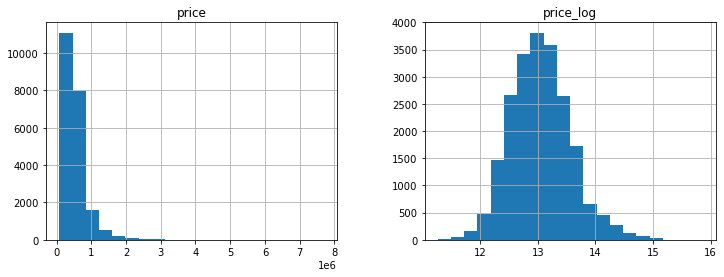

price_log skew: 0.43107952959103885
price_log kurtosis: 0.6910469577374965


In [52]:
# Creating price log column given skew
create_log(kc, 'price', col_pos=3, bins=20)

**Notes of Price Log**
- Price is highly skewed with 198 values more than 4 standard deviations from the mean
- Going ahead and creating price_log column and as shown above, it's relatively normal with little skew.
- Price log looks great, 0.4 skew and 0.7 kurtosis, should hold up much better in linear models.
- Price_log will be available for use in Model section

-0.2361553521948681
price_box 4 Std Dev: 4.134068369733234 | Home Counts above this size: 1 | Skew: -0.011919937023303982 | Kurtosis: 0.3062722180959363


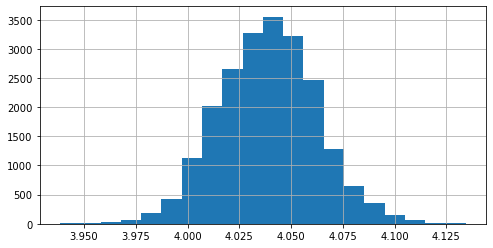

In [14]:
price_box = []
price_box, price_lambda = stats.boxcox(kc.price)
kc.insert(loc=4, column='price_box', value=pd.Series(price_box))
print(price_lambda)
check_normality(kc, 'price_box', bins=20)

In [40]:
# Check if nan issue on one record 21596 persists
kc[kc.price_box.isnull()==True]

,id,date,price,bedrooms,price_box,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [46]:
# boxcox transformation leaves last row with nan. replacing with median.
def box_fillna(df, column):
    median = df[column].median()
    df[column] = df[column].astype('string')
    df[column].replace(np.nan, median, inplace=True)
    df[column] = df[column].astype('float')

In [47]:
box_fillna(kc, 'price_box')

#### Lot Size Log

In [ ]:
check_normality(kc, 'sqft_lot', bins=20)

**Notes on Lot Size**
- 291 outliers above 4 standard deviations "mega lots"
- Usually lot size should be a significant variable in price, going transform or adjust for these mega size lots

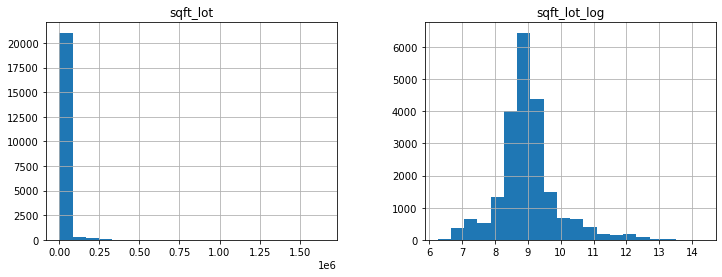

sqft_lot_log skew: 0.962441865571436
sqft_lot_log kurtosis: 3.3297326183287126


In [41]:
# Creating lot_size log column given skew
create_log(kc, 'sqft_lot', col_pos=9, bins=20)

**Notes on Lot Size Log**
- Outliers make lot_size highly positively skewed
- Log function brings to normal, almost perfect with Skew near 1 and Kurtosis near 3.

-0.19297462232104715
sqft_lot_box 4 Std Dev: 4.8656846419159745 | Home Counts above this size: 0 | Skew: -0.10698100645759137 | Kurtosis: 1.9132610561751


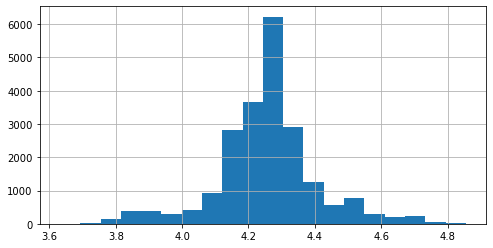

In [42]:
sqft_lot_box = []
sqft_lot_box, sqft_box_lambda = stats.boxcox(kc.sqft_lot)
kc.insert(loc=10, column='sqft_lot_box', value=pd.Series(sqft_lot_box))
print(sqft_box_lambda)
check_normality(kc, 'sqft_lot_box', bins=20)

In [117]:
box_fillna(kc, 'sqft_lot_box')

#### Sqft Living Log

In [ ]:
check_normality(kc, 'sqft_living', bins=20)

**Notes on Square Foot Living**
- 94 outliers above 4 standard deviations "mega homes"
- Let's create a log transform to see how normal we can get since sqft_living will be one of our top predictors
- Validated there are no 0 values in field before log transform

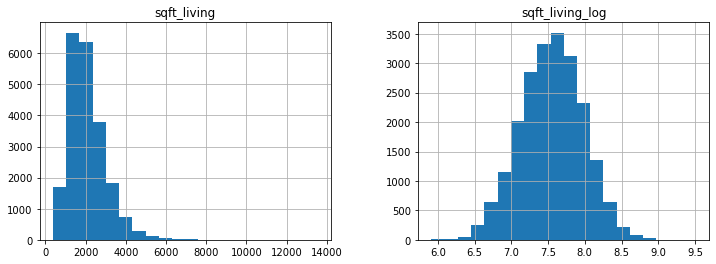

sqft_living_log skew: -0.02741167569494022
sqft_living_log kurtosis: -0.07913378171831864


In [43]:
# Creating lot_size log column given skew
create_log(kc, 'sqft_living', col_pos=8, bins=20)

0.02221621916765391
sqft_living_box 4 Std Dev: 10.229929408172227 | Home Counts above this size: 2 | Skew: -0.0003251050729460044 | Kurtosis: -0.07383931972154079


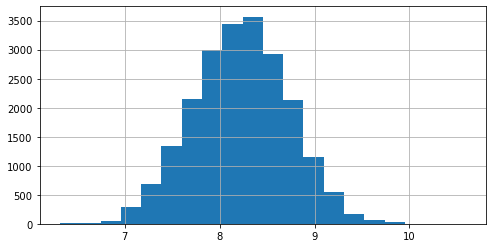

In [44]:
sqft_living_box = []
sqft_living_box, sqft_living_lambda = stats.boxcox(kc.sqft_living)
kc.insert(loc=9, column='sqft_living_box', value=pd.Series(sqft_living_box))
print(sqft_living_lambda)
check_normality(kc, 'sqft_living_box', bins=20)

In [49]:
# Check if nan issue on one record 21596 persists
kc[kc.sqft_living_box.isnull()==True]

,id,date,price,bedrooms,price_box,bathrooms,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [48]:
box_fillna(kc, 'sqft_living_box')

#### Sqft  Above Log

In [ ]:
check_normality(kc, 'sqft_above', bins=20)

**Notes on Square Foot Living**
- 94 outliers above 4 standard deviations "mega homes"
- Let's create a log transform to see how normal we can get since sqft_living will be one of our top predictors

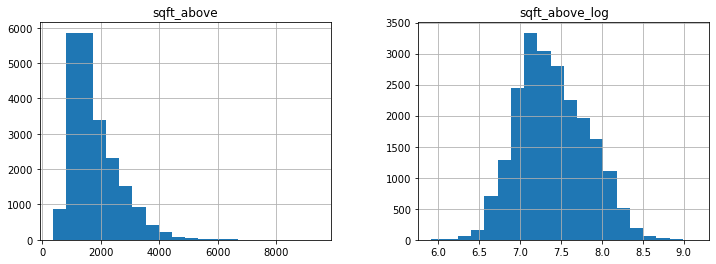

sqft_above_log skew: 0.25962050320447505
sqft_above_log kurtosis: -0.3338961015253301


In [50]:
create_log(kc, 'sqft_above', col_pos=19, bins=20)

#### Sqft Living15

In [ ]:
check_normality(kc, 'sqft_living15', bins=20)

**Notes on Sq Ft Living 15**
- Sqft_living15 slightly skewed positively, but not going to pursue log transform at this point.

#### Sqft Lot 15 Log

In [ ]:
check_normality(kc, 'sqft_lot15', bins=20)

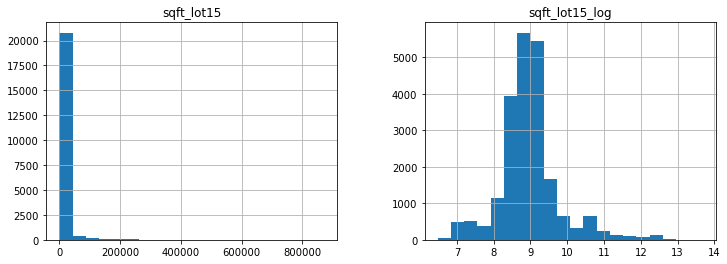

sqft_lot15_log skew: 0.9661306389463542
sqft_lot15_log kurtosis: 3.564141691595105


In [53]:
create_log(kc, 'sqft_lot15', col_pos=28, bins=20)

**Notes on Sqft Lot 15**
- Tons of outliers, highly skewed like lot size.
- Log transformation brings into normal shape with near 1 skew and 3.6 kurosis

#### Bedrooms Log

In [ ]:
check_normality(kc, 'bedrooms', bins=20)

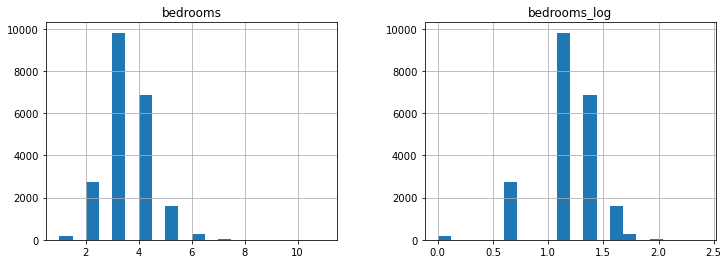

bedrooms_log skew: -0.7081340456551628
bedrooms_log kurtosis: 1.872540737687534


In [54]:
create_log(kc, 'bedrooms', col_pos=6, bins=20)

0.5853619981038436
bedrooms_box 4 Std Dev: 3.9310226424213295 | Home Counts above this size: 23 | Skew: 0.04696202835031031 | Kurtosis: 0.9475444757643201


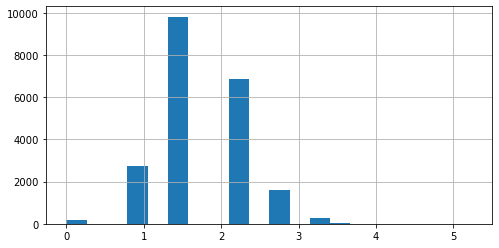

In [55]:
# transform training data & save lambda value 
bedrooms_box = []
bedrooms_box, bedrooms_lambda = stats.boxcox(kc.bedrooms)
kc.insert(loc=7, column='bedrooms_box', value=pd.Series(bedrooms_box))
print(bedrooms_lambda)
check_normality(kc, 'bedrooms_box', bins=20)

In [57]:
kc.tail(1)

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,bathrooms,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_above_log,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
21596,1523300157,2014-10-15,"325,000.00",12.69,2,4.04,0.69,nan,0.75,1020,1076,6.93,8.23,2.00,6.98,nan,0.00,0.00,3,7,1020,0,6.93,2008,0,98144,47.59,-122.30,1020,1357,7.21


In [58]:
box_fillna(kc, 'bedrooms_box')

#### Bathrooms Log

In [ ]:
check_normality(kc, 'bathrooms', bins=20)

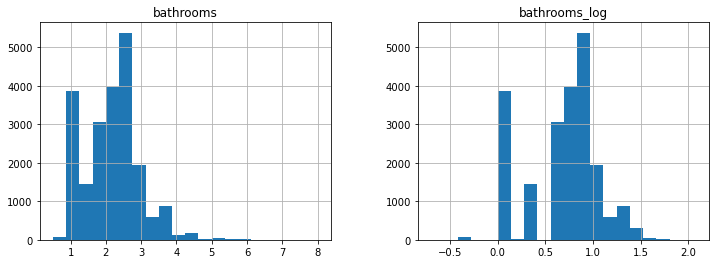

bathrooms_log skew: -0.4933014063951873
bathrooms_log kurtosis: -0.46387674535462864


In [59]:
create_log(kc, 'bathrooms', col_pos=9, bins=20)

0.5346126015678513
bathrooms_box 4 Std Dev: 3.0709382512250003 | Home Counts above this size: 10 | Skew: -0.02415740747364864 | Kurtosis: -0.1047594861960861


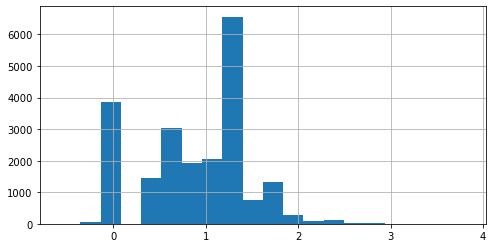

In [60]:
# transform training data & save lambda value 
bathrooms_box = []
bathrooms_box, bathrooms_lambda = stats.boxcox(kc.bathrooms)
kc.insert(loc=10, column='bathrooms_box', value=pd.Series(bathrooms_box))
print(bathrooms_lambda)
check_normality(kc, 'bathrooms_box', bins=20)

In [61]:
kc.tail(1)

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_above_log,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
21596,1523300157,2014-10-15,"325,000.00",12.69,2,4.04,0.69,1.54,0.75,-0.29,nan,1020,1076,6.93,8.23,2.00,6.98,nan,0.00,0.00,3,7,1020,0,6.93,2008,0,98144,47.59,-122.30,1020,1357,7.21


In [62]:
box_fillna(kc, 'bathrooms_box')

#### Renovation Indicator

In [63]:
# Create indicator column for homes showing renovation years (1 = Renovation)
kc.insert(loc=27, column='renovation_ind', value=np.where((kc.yr_renovated.isnull()) | (kc.yr_renovated==0), 0, 1))
kc.head() 

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_above_log,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,4.00,1.10,1.54,1.00,0.00,0.00,1180,5650,7.07,7.66,1.00,8.64,4.20,0.00,0.00,3,7,1180,0,7.07,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,4.05,1.10,1.54,2.25,0.81,1.02,2570,7242,7.85,8.58,2.00,8.89,4.25,0.00,0.00,3,7,2170,400,7.68,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,3.99,0.69,0.85,1.00,0.00,0.00,770,10000,6.65,7.16,1.00,9.21,4.31,0.00,0.00,3,6,770,0,6.65,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,4.05,1.39,2.14,3.00,1.10,1.49,1960,5000,7.58,8.26,1.00,8.52,4.18,0.00,0.00,5,7,1050,910,6.96,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,4.04,1.10,1.54,2.00,0.69,0.84,1680,8080,7.43,8.07,1.00,9.00,4.27,0.00,0.00,3,8,1680,0,7.43,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


#### Basement Indicator

In [64]:
# Create indicator column for homes with basement based on non-zero sqft
kc.insert(loc=25, column='basement_ind', value=np.where(kc.sqft_basement==0, 0, 1))
kc.head() 

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,4.00,1.10,1.54,1.00,0.00,0.00,1180,5650,7.07,7.66,1.00,8.64,4.20,0.00,0.00,3,7,1180,0,7.07,0,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,4.05,1.10,1.54,2.25,0.81,1.02,2570,7242,7.85,8.58,2.00,8.89,4.25,0.00,0.00,3,7,2170,400,7.68,1,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,3.99,0.69,0.85,1.00,0.00,0.00,770,10000,6.65,7.16,1.00,9.21,4.31,0.00,0.00,3,6,770,0,6.65,0,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,4.05,1.39,2.14,3.00,1.10,1.49,1960,5000,7.58,8.26,1.00,8.52,4.18,0.00,0.00,5,7,1050,910,6.96,1,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,4.04,1.10,1.54,2.00,0.69,0.84,1680,8080,7.43,8.07,1.00,9.00,4.27,0.00,0.00,3,8,1680,0,7.43,0,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


#### Sqft Per Bedroom

In [65]:
kc.insert(loc=8, column='sqft_per_bedroom', value=kc['sqft_living']/kc['bedrooms'])
kc.head()

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,4.00,1.10,1.54,393.33,1.00,0.00,0.00,1180,5650,7.07,7.66,1.00,8.64,4.20,0.00,0.00,3,7,1180,0,7.07,0,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,4.05,1.10,1.54,856.67,2.25,0.81,1.02,2570,7242,7.85,8.58,2.00,8.89,4.25,0.00,0.00,3,7,2170,400,7.68,1,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,3.99,0.69,0.85,385.00,1.00,0.00,0.00,770,10000,6.65,7.16,1.00,9.21,4.31,0.00,0.00,3,6,770,0,6.65,0,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,4.05,1.39,2.14,490.00,3.00,1.10,1.49,1960,5000,7.58,8.26,1.00,8.52,4.18,0.00,0.00,5,7,1050,910,6.96,1,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,4.04,1.10,1.54,560.00,2.00,0.69,0.84,1680,8080,7.43,8.07,1.00,9.00,4.27,0.00,0.00,3,8,1680,0,7.43,0,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


In [ ]:
check_normality(kc, 'sqft_per_bedroom', bins=20)

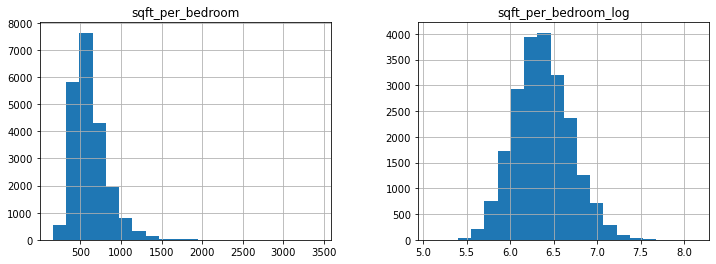

sqft_per_bedroom_log skew: 0.28789619313930154
sqft_per_bedroom_log kurtosis: 0.1447890918941246


In [66]:
create_log(kc, 'sqft_per_bedroom', col_pos=9, bins=20)

#### Bedrooms Derived

In [67]:
kc.insert(loc=10, column='bedroom_der', value=kc.bedrooms.map(lambda x: x if x<=6 else 6))

#### Condition Group

In [68]:
condition_map = {1: 'poor', 2: 'poor', 3: 'average', 4: 'average', 5: 'excellent'}
kc.insert(loc=24, column='condition_grp', value=kc.condition.map(condition_map))
kc.head()

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot15_log
0,7129300520,2014-10-13,"221,900.00",12.31,3,4.00,1.10,1.54,393.33,5.97,3,1.00,0.00,0.00,1180,5650,7.07,7.66,1.00,8.64,4.20,0.00,0.00,3,average,7,1180,0,7.07,0,1955,0,0,98178,47.51,-122.26,1340,5650,8.64
1,6414100192,2014-12-09,"538,000.00",13.20,3,4.05,1.10,1.54,856.67,6.75,3,2.25,0.81,1.02,2570,7242,7.85,8.58,2.00,8.89,4.25,0.00,0.00,3,average,7,2170,400,7.68,1,1951,1991,1,98125,47.72,-122.32,1690,7639,8.94
2,5631500400,2015-02-25,"180,000.00",12.10,2,3.99,0.69,0.85,385.00,5.95,2,1.00,0.00,0.00,770,10000,6.65,7.16,1.00,9.21,4.31,0.00,0.00,3,average,6,770,0,6.65,0,1933,0,0,98028,47.74,-122.23,2720,8062,8.99
3,2487200875,2014-12-09,"604,000.00",13.31,4,4.05,1.39,2.14,490.00,6.19,4,3.00,1.10,1.49,1960,5000,7.58,8.26,1.00,8.52,4.18,0.00,0.00,5,excellent,7,1050,910,6.96,1,1965,0,0,98136,47.52,-122.39,1360,5000,8.52
4,1954400510,2015-02-18,"510,000.00",13.14,3,4.04,1.10,1.54,560.00,6.33,3,2.00,0.69,0.84,1680,8080,7.43,8.07,1.00,9.00,4.27,0.00,0.00,3,average,8,1680,0,7.43,0,1987,0,0,98074,47.62,-122.05,1800,7503,8.92


#### Miles From Seattle

In [69]:
# create tuple for each home of latitude and longitudes to feed mileage calculation
seattle_coord = tuple([47.608013, -122.335167])
kc.insert(loc=36, column='home_lat_long',value = tuple(zip(kc.lat, kc.long)))

In [70]:
# create feature of miles from city center of Seattle
seattle_calc = []
for home in kc['home_lat_long']:
    seattle_calc.append(haversine(home, seattle_coord, unit='mi'))
    
kc['miles_fr_seattle'] = pd.Series(seattle_calc)
kc.miles_fr_seattle.fillna(kc.miles_fr_seattle.median(), inplace=True)
kc.head()

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle
0,7129300520,2014-10-13,"221,900.00",12.31,3,4.00,1.10,1.54,393.33,5.97,3,1.00,0.00,0.00,1180,5650,7.07,7.66,1.00,8.64,4.20,0.00,0.00,3,average,7,1180,0,7.07,0,1955,0,0,98178,47.51,-122.26,"(47.5112, -122.257)",1340,5650,8.64,7.62
1,6414100192,2014-12-09,"538,000.00",13.20,3,4.05,1.10,1.54,856.67,6.75,3,2.25,0.81,1.02,2570,7242,7.85,8.58,2.00,8.89,4.25,0.00,0.00,3,average,7,2170,400,7.68,1,1951,1991,1,98125,47.72,-122.32,"(47.721000000000004, -122.319)",1690,7639,8.94,7.84
2,5631500400,2015-02-25,"180,000.00",12.10,2,3.99,0.69,0.85,385.00,5.95,2,1.00,0.00,0.00,770,10000,6.65,7.16,1.00,9.21,4.31,0.00,0.00,3,average,6,770,0,6.65,0,1933,0,0,98028,47.74,-122.23,"(47.7379, -122.23299999999999)",2720,8062,8.99,10.16
3,2487200875,2014-12-09,"604,000.00",13.31,4,4.05,1.39,2.14,490.00,6.19,4,3.00,1.10,1.49,1960,5000,7.58,8.26,1.00,8.52,4.18,0.00,0.00,5,excellent,7,1050,910,6.96,1,1965,0,0,98136,47.52,-122.39,"(47.5208, -122.39299999999999)",1360,5000,8.52,6.60
4,1954400510,2015-02-18,"510,000.00",13.14,3,4.04,1.10,1.54,560.00,6.33,3,2.00,0.69,0.84,1680,8080,7.43,8.07,1.00,9.00,4.27,0.00,0.00,3,average,8,1680,0,7.43,0,1987,0,0,98074,47.62,-122.05,"(47.6168, -122.045)",1800,7503,8.92,13.53


In [71]:
kc[kc['miles_fr_seattle'].isna()==True].head()

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle


In [ ]:
check_normality(kc, 'miles_fr_seattle')

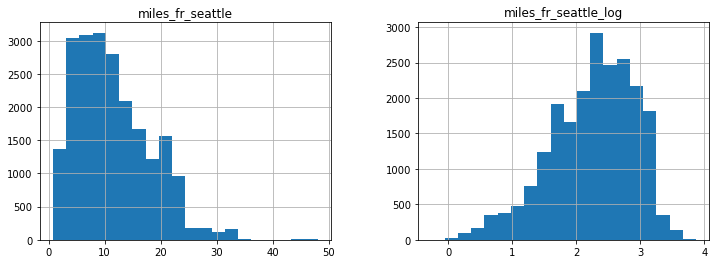

miles_fr_seattle_log skew: -0.5909581116428807
miles_fr_seattle_log kurtosis: -0.022811683040730113


In [72]:
# transform training data & save lambda value 
create_log(kc, 'miles_fr_seattle', col_pos=37, bins=20)

miles_fr_seattle_sqrt 4 Std Dev: 7.212433819932752 | Home Counts above this size: 0 | Skew: 0.12991689958589042 | Kurtosis: -0.5808706476636059


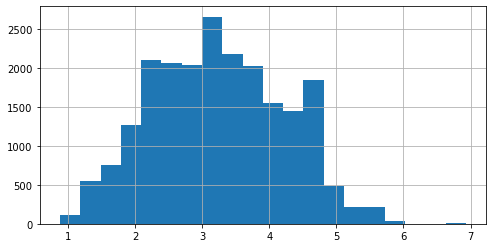

In [73]:
kc['miles_fr_seattle_sqrt']=np.sqrt(kc['miles_fr_seattle'])
check_normality(kc, 'miles_fr_seattle_sqrt')

#### Zip Price Sqft Decile

In [74]:
kc['price_sf'] = kc['price']/kc['sqft_living']
zip_psf = kc.groupby('zipcode')['price_sf'].median().reset_index()

In [ ]:
kc['price_sf'].hist()

In [ ]:
zip_psf['price_sf'].hist()

In [ ]:
np.log(zip_psf['price_sf']).hist()

In [75]:
fitted_data, fitted_lambda = stats.boxcox(zip_psf['price_sf'])
print(f'fitted lambda is {fitted_lambda}')

fitted lambda is -0.41015480777301483


In [76]:
box = pd.DataFrame(fitted_data, columns = ['zip_price_sf_box'])
zip_psf_box = pd.concat([zip_psf, box], axis=1)
pd.options.display.float_format = '{:,.8f}'.format
zip_psf_box.head()

# scipy.special.inv_boxcox(y, lambda)

,zipcode,price_sf,zip_price_sf_box
0,98001,147.14134463,2.12336857
1,98002,147.17741935,2.12340021
2,98003,154.81924571,2.12986667
3,98004,456.94444444,2.24036295
4,98005,316.34043088,2.20817059


In [ ]:
check_normality(zip_psf_box, 'zip_price_sf_box', bins=10)

In [77]:
# Get the bin edges with retbin
results, bins_edges = pd.qcut(zip_psf_box['zip_price_sf_box'], q=10, retbins=True)

def create_intervals(array):
    ''' Simple function to print the width of each bin from the bin edges in the passed list.'''
    interval_dict = {}
    zip_psf_deciles = []
    for index, edge in enumerate(array):
        if index == 0:
            continue
        interval_dict = {'decile': index, 'upper_range': edge}
        zip_psf_deciles.append(interval_dict)
    return zip_psf_deciles

zip_psf_deciles = create_intervals(bins_edges)
zip_psf_deciles

[{'decile': 1, 'upper_range': 2.131502681750592},
 {'decile': 2, 'upper_range': 2.1434853039526396},
 {'decile': 3, 'upper_range': 2.1608433532433304},
 {'decile': 4, 'upper_range': 2.168390229052141},
 {'decile': 5, 'upper_range': 2.1817738704687497},
 {'decile': 6, 'upper_range': 2.1885994360144547},
 {'decile': 7, 'upper_range': 2.199363148678238},
 {'decile': 8, 'upper_range': 2.2138002397137817},
 {'decile': 9, 'upper_range': 2.224337147729981},
 {'decile': 10, 'upper_range': 2.256872144006299}]

In [78]:
# function to return key for any value
def map_psf_decile(val):
    for d in zip_psf_deciles:
        if val <= d['upper_range']:
            return d['decile']
        elif (d['decile']==10) & (val > d['upper_range']):
            return d['decile']
    return "value out of range"

In [79]:
kc[kc['price_sf'].isna()==True]
# kc.iloc[15856:15857]

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf


In [80]:
fit_price_sf = stats.boxcox(kc['price_sf'], fitted_lambda)
box_kc = pd.DataFrame(fit_price_sf, columns = ['price_sf_box'])

In [87]:
len(fit_price_sf), len(box_kc), len(kc)

(21596, 21596, 21597)

In [82]:
kc = pd.concat([kc, box_kc], axis=1)
kc.tail(1)

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box
21596,"1,523,300,157.00000000",2014-10-15,"325,000.00000000",12.69158046,2.00000000,4.03872181,0.69314718,1.54151148,510.00000000,6.23441073,2.00000000,0.75000000,-0.28768207,1.01512581,"1,020.00000000","1,076.00000000",6.92755791,8.22587403,2.00000000,6.98100574,nan,0.00000000,0.00000000,3.00000000,average,7.00000000,"1,020.00000000",0.00000000,6.92755791,0.00000000,"2,008.00000000",0.00000000,0.00000000,98144,47.59410000,-122.29900000,"(47.5941, -122.29899999999999)",2.33441902,"1,020.00000000","1,357.00000000",7.21303166,10.32346046,3.21301423,318.62745098,nan


In [84]:
box_fillna(kc, 'price_sf_box')

In [91]:
kc.iloc[15856:15857]

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box
15856,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,2.12695927


In [92]:
# record index 15856, dropped in outliers section keeps reappearing when running this code:
# kc = pd.concat([kc, box_kc], axis=1); somehow the concatenation is bring back this index with all nans.  
kc.drop([15856], inplace=True)

In [93]:
kc['price_sf_box_decile'] = kc['price_sf_box'].apply(lambda x: map_psf_decile(x)).astype(int)

In [97]:
# check for duplicate columns from running multiple times
kc.tail(1)

,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box,price_sf_box_decile
21596,"1,523,300,157.00000000",2014-10-15,"325,000.00000000",12.69158046,2.00000000,4.03872181,0.69314718,1.54151148,510.00000000,6.23441073,2.00000000,0.75000000,-0.28768207,1.01512581,"1,020.00000000","1,076.00000000",6.92755791,8.22587403,2.00000000,6.98100574,nan,0.00000000,0.00000000,3.00000000,average,7.00000000,"1,020.00000000",0.00000000,6.92755791,0.00000000,"2,008.00000000",0.00000000,0.00000000,98144,47.59410000,-122.29900000,"(47.5941, -122.29899999999999)",2.33441902,"1,020.00000000","1,357.00000000",7.21303166,10.32346046,3.21301423,318.62745098,2.18260094,6


In [ ]:
# kc.drop(columns=['price_sf_box'], axis=1, inplace=True)

In [98]:
kc.groupby('price_sf_box_decile')['price_sf'].median()

price_sf_box_decile
1    143.54066986
2    167.10201651
3    188.29268293
4    208.10810811
5    229.11740159
6    250.00000000
7    272.30046948
8    306.16681072
9    350.82236842
10   417.35537190
Name: price_sf, dtype: float64

price_sf_box 4 Std Dev: 2.3455369341160752 | Home Counts above this size: 0 | Skew: -0.2585338862647854 | Kurtosis: -0.29294699462834517


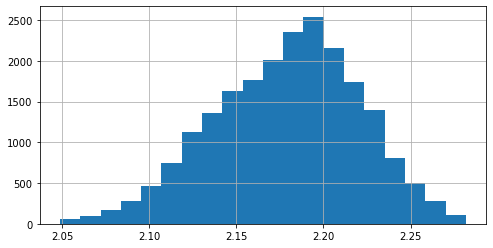

In [99]:
check_normality(kc, 'price_sf_box')

price_sf 4 Std Dev: 616.2264312072768 | Home Counts above this size: 0 | Skew: 0.9731375539795851 | Kurtosis: 0.83652013622229


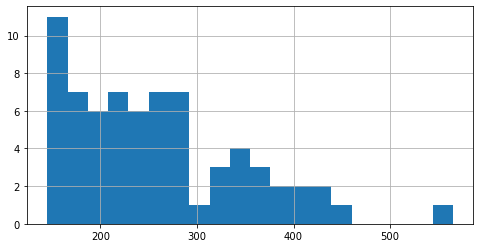

In [100]:
check_normality(zip_psf_box, 'price_sf')

zip_price_sf_box 4 Std Dev: 2.3181398805616467 | Home Counts above this size: 0 | Skew: 0.04165867960961311 | Kurtosis: -0.8938377485526492


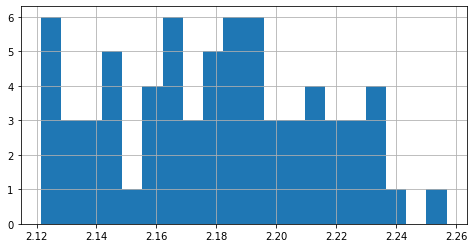

In [101]:
check_normality(zip_psf_box, 'zip_price_sf_box')

price_sf_box_decile 4 Std Dev: 17.750301584014835 | Home Counts above this size: 0 | Skew: -0.07110207640085976 | Kurtosis: -1.297031875548991


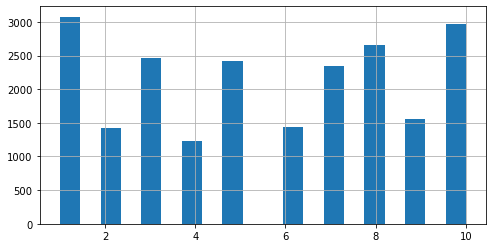

In [102]:
check_normality(kc, 'price_sf_box_decile')

#### Zip Price Sqft Decile 2

price_sf 4 Std Dev: 704.1333051746667 | Home Counts above this size: 76 | Skew: 1.2471022617551608 | Kurtosis: 2.0999301666916343


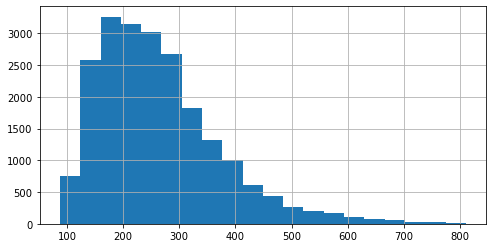

In [103]:
check_normality(kc, 'price_sf')

In [ ]:
kc.head()

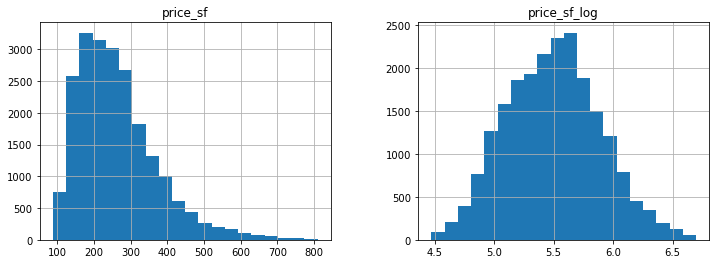

price_sf_log skew: 0.1405260365890009
price_sf_log kurtosis: -0.2951939509791961


In [104]:
create_log(kc, 'price_sf')

In [105]:
# dataframe with median price_sf for each zipcode
zip_psf_medians = kc.groupby('zipcode')['price_sf'].median()
zip_psf_medians.head()

zipcode
98001   147.14134463
98002   147.17741935
98003   154.81924571
98004   456.94444444
98005   316.34043088
Name: price_sf, dtype: float64

In [106]:
# function to return key for any value
def zip_median_lookup(zipcode):
    for z, m in zip_psf_medians.items():
        if zipcode == z:
            return m
        else:
            continue
    return "value not found"

In [107]:
# apply zip_median_lookup function to dataframe to generate feature
kc['zip_psf_median'] = kc.zipcode.apply(lambda z: zip_median_lookup(z)).astype(float)

zip_psf_median 4 Std Dev: 569.7755353275165 | Home Counts above this size: 0 | Skew: 0.6116961603141974 | Kurtosis: -0.1132435579740112


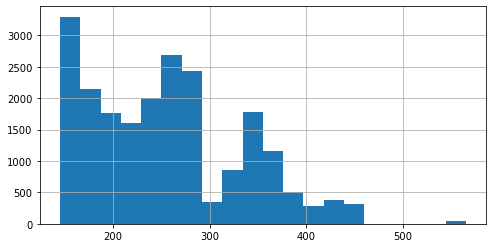

In [108]:
check_normality(kc, 'zip_psf_median')

In [109]:
kc[kc.zip_psf_median.isnull()==True]

,price_sf_log,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box,price_sf_box_decile,zip_psf_median


In [110]:
fit_psf_median, median_lambda = stats.boxcox(kc['zip_psf_median'])
box_zip_median = pd.DataFrame(fit_psf_median, columns = ['zip_psf_median_box'])
print(f'zip median lambda is {median_lambda}')

zip median lambda is -0.07960809846686995


zip_psf_median_box 4 Std Dev: 5.242478152668861 | Home Counts above this size: 0 | Skew: 0.0075463489065949055 | Kurtosis: -0.9249159873746322


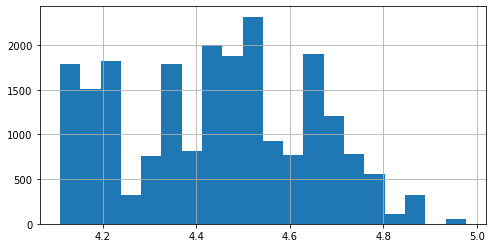

In [111]:
check_normality(box_zip_median, 'zip_psf_median_box')

In [112]:
kc = pd.concat([kc, box_zip_median], axis=1)

In [114]:
kc.tail(1)

,price_sf_log,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box,price_sf_box_decile,zip_psf_median,zip_psf_median_box
21596,5.76402256,"1,523,300,157.00000000",2014-10-15,"325,000.00000000",12.69158046,2.00000000,4.03872181,0.69314718,1.54151148,510.00000000,6.23441073,2.00000000,0.75000000,-0.28768207,1.01512581,"1,020.00000000","1,076.00000000",6.92755791,8.22587403,2.00000000,6.98100574,nan,0.00000000,0.00000000,3.00000000,average,7.00000000,"1,020.00000000",0.00000000,6.92755791,0.00000000,"2,008.00000000",0.00000000,0.00000000,98144,47.59410000,-122.29900000,"(47.5941, -122.29899999999999)",2.33441902,"1,020.00000000","1,357.00000000",7.21303166,10.32346046,3.21301423,318.62745098,2.18260094,6.00000000,302.63157895,nan


In [115]:
box_fillna(kc, 'zip_psf_median_box')

In [ ]:
# kc.drop(columns='zip_psf_median_box', axis=1, inplace=True)

In [118]:
kc[kc.isna().any(axis=1)==True]

,price_sf_log,id,date,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,home_lat_long,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box,price_sf_box_decile,zip_psf_median,zip_psf_median_box
15856,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.25860061,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.11898861


In [119]:
kc.drop([15856], inplace=True)

### Time Series Analysis

#### Sales By Month

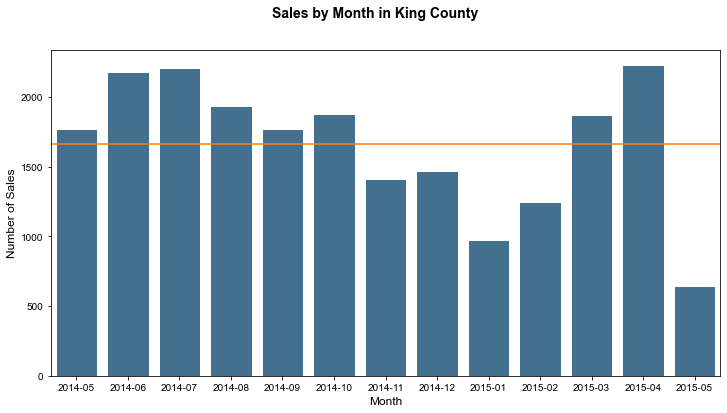

In [120]:
# Plot number of sales by month for King County home sales data
kc['sales_cnt']=1 # dummy variable to sum sales
kc['year_month'] = kc.date.dt.to_period('m') # transform date into month
df_grp = kc.groupby(['year_month'])['sales_cnt'].sum().reset_index()

# Create barplot with average line
f, ax = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Sales by Month in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='year_month', y='sales_cnt', color='tab:blue', saturation=.5)
ax.axhline(df_grp.sales_cnt.mean(), color='tab:orange')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
plt.show()

**Notes on Sales Trend**
- Total sales transations of 21,597 spread across 13 months with 1,661 average/month in sample
- May 2015 looks to be a partial month, may excluded it to have a complete 1 year of data (2014-05 through 2015-04)
- Sales time series exhibits expected seasonality in Spring/Summer with slower Winter months

#### Sales By Year Built

In [ ]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sales_cnt'].sum().reset_index()
df_grp2 = kc.groupby(['yr_built'])['price'].mean().reset_index()

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Sales by Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sales_cnt', color='tab:blue', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)
plt.show()

#### Avg Living Space and BR

In [ ]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sqft_living'].mean().reset_index()
df_grp2 = kc.groupby(['yr_built'])['bedrooms'].mean().reset_index()
df_grp3 = df_grp.merge(df_grp2)
df_grp3['sqft_per_bedroom']=df_grp3['sqft_living']/df_grp3['bedrooms']

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Average Living Space By Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sqft_living', color='tab:orange', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Average Living Space', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp3['sqft_per_bedroom'], marker='o', ax=ax2)
ax2.set_ylabel('Average Living Sqft Per Bedroom', fontsize=12)
plt.show()

**Notes on Living Space Year Built**
- Average Living Space: 1,764 (<1970) vs. 
- Average Bedrooms: 3.20 vs.
- Living Sqft Per Bedroom: 552 vs.

In [ ]:
df_grp3['yr_built_der'] = df_grp3.yr_built.map(lambda x: 'pre-1970' if x < 1970 else 'post-1970')
df_grp3.groupby('yr_built_der').mean()

In [ ]:
print(f'{len(kc[kc.bedrooms>6])} homes, or {round(len(kc[kc.bedrooms>6])/len(kc),3)}% of total, have greater than 6 bedrooms ')

### Category Profiles

#### Plot Functions

In [ ]:
# Define function to generate Top N values, counts and % total for a column
def topn_count(df, column, topn):
    c = df[column].value_counts(dropna=False)
    p = df[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    cp = (100*df.groupby(column).size().cumsum()/df.groupby(column).size().sum()).round(1).astype(str) + '%'
    print(f'Top 10 Counts By {column.title()}')
    return pd.concat([c, p ,cp], axis=1, keys=['Counts', '%', 'Cum %']).iloc[:topn]

In [ ]:
#  topn_count(kc, 'bedrooms', 10)

In [ ]:
# Define function to generate 3 plots for X and Y columns in a dataframe: Histogram, Price Box Plot and Top N % Distribution
def distplots(df, xcol, ycol, topn):
    # Set a figure with 3 subplots and figure-level settings
    f, (ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
    sns.set_theme(style='ticks', palette='deep')
    sns.set_style('whitegrid')
    f.suptitle('Column Value Distributions', fontsize=14, fontweight ='bold')
    f.tight_layout(pad=3)
    
    # Subplot 1 - Histogram by desired xcol showing probability %
    ax = plt.subplot2grid((1, 7), (0, 0), colspan=2)
    ax = sns.histplot(data=df, x=xcol, color='skyblue', stat='probability', discrete = True, ax=ax)
    ax.set_title('Histogram')

    # Subplot 2 - Scatter plot xcol vs. ycol
    ax2 = plt.subplot2grid((1, 7), (0, 2), colspan=2)
    ax2 = sns.scatterplot(df[xcol], df[ycol])
    ax2.set_title(f'{ycol.title()} vs {xcol.title()} Scatterplot')
#     ax2.set_xlabel(column)
#     ax2.set_ylabel('Sale Price in $100,000')
    
    # Subplot 3 - Boxplot by desired xcol against ycol (e.g. price) to see distributions grouped by xcol
    ax3 = plt.subplot2grid((1, 7), (0, 4), colspan=2)
    ax3 = sns.boxplot(data=df, x=xcol, y=ycol, showfliers=False, ax=ax3) # Excludes outliers for presentability 
    ax3.set_title('Boxplot')

    # Calculate medians and number of observations per group for use in positioning labels on plot
    medians = df.groupby([xcol])[ycol].median().values
    nobs = df[xcol].value_counts(sort=False).sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add number of observations to the boxplot for indication of each box's relative likelihood
    pos = range(len(nobs))
    for tick, label in zip(pos, ax2.get_xticklabels()):
        ax3.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='bold')
    
    # Subplot 4 - Add dataframe top N value counts and % of group as a table in 3rd plot
    top = topn_count(df, xcol, topn)
    ax4 = plt.subplot2grid((1, 7), (0, 6))
    ax4.table(cellText=top.values,rowLabels=top.index, colLabels=top.columns, cellLoc = 'center', rowLoc = 'center', loc='center')
    ax4.axis("off")
    ax4.set_title('Top Values')
    plt.show()

In [ ]:
# data.hist(figsize=(18,15), bins='auto');

#### Bedrooms

In [ ]:
distplots(kc, 'bedrooms', 'price', 10)

**Notes on Bedrooms**
- One outlier at 33 BR excluded for graph presentability
- Mode is 3 BR and 78% are 3/4 BR. Only 1.5% higher than 5 BR and only 1% at 1 BR.
- Limiting to 1-6 BR looks relatively normal, might not need log transformation. This would mean dropping 0.3% of the data from modeling.
- Median price increases from 1-7 BRs, assume strong correlation. The IQR upper whisker increases more than lower whisker for higher bedrooms.

#### Bathrooms

In [ ]:
distplots(kc, 'bathrooms', 'price', 23)

**Notes on Bathrooms**
- Over 50% of homes have quarter or half bathrooms listed (.25, .5 or .75); Are half-baths worth 50% of a bath count in regression?
- Roughly 49% home have 2-3 baths, another 39% have 1-2 baths; 98% have 3 baths or under.
- Outliers: 75 homes (0.3%) have less than 1 bathroom. 12 homes have 6 or more. If bathrooms in model, might drop both outliers (1-6 baths).
- Distribution looks skewed right, might need log transformation.
- Median price increases with bathrooms, linear if not exponetially.

#### Floors

In [ ]:
distplots(kc, 'floors', 'price', 10)

**Notes on Floors**
- Approximately 10% of homes have split-levels; Are half-floors worth 50% of a floor in regression?
- Roughly 49% home have single floor, another 38% have 2; Only 3% have 3 floors or higher (small samples and prices don't scale).
- Outliers: None
- Distribution not normal, would use category OHE variables.
- Median price and upper whisker band increases linearly with floors until 3+. Split level 1.5 similar to 2 floors in pricing.

#### Condition

In [ ]:
distplots(kc, 'condition', 'price', 5)

**Notes on Condition**
- From data dictionary: Score of 1/2 indicate major repairs required. Score 3 is average, with 4/5 be above average and exceptional.
- Roughly 2/3rd of homes are average (3), 1/4 are above average (4) and top 8% score excellent (5).
- Only 1% have 1/2 scores, probably due to market requirements to have a functional home to list for sale.
- Outliers: None denoted
- Distribution skewed left, candidate for category feature using OHE.
- Median price and IQR bands exhibit increasing step functions: 1/2 cluster-->3/4 cluster-->5

#### Grade

In [ ]:
distplots(kc, 'grade', 'price', 13)

**Notes on Grade**
- From data dictionary: Range from 1-13 as an indication of quality level of building. 1-3 unfit, 13 mansion, 7 average.
- Roughly 41% of homes are average (7), another 37% at 6 or 8. Top 20% are 9+.
- Outliers: None denoted
- Distribution appears farily normal, candidate for continuous variable without log transformation.
- Median price and IQR bands exhibit exponetialality, pivoting at 9-13 markedly upwards.

#### Waterfront

In [ ]:
distplots(kc, 'waterfront', 'price', 10)

**Notes on Waterfront**
- Small sample of 146 but nearly triple the prices with high skew higher

#### Renovation Ind

In [ ]:
distplots(kc, 'renovation_ind', 'price', 10)

**Notes on Renovation Indicator**
- Small sample of 744 but median price is ~25% higher

#### View

In [ ]:
distplots(kc, 'view', 'price', 10)
plt.show()

**Notes on View**
- Only about 10% have a view value but media prices definitely get a lift, especially views 3/4

#### Zip

In [ ]:
# Boxplot showing distributions of sales price by zipcode
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

**Notes on Zip**
- 70 distinct zip codes
- Zipcode definitely influence prices and price distributions
- Medians above \\$1M: 3 zips, Upper Whiskers above \\$1M: 8
- Outliers above \\$4M: 6 zips 

In [ ]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(12,6))
sns.boxplot(data=kc, x='price_sf_box_decile', y='price_sf', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Continuous Profiles

In [ ]:
# Columns on which to generate histograms to distribution exploration
pair_col1 = ['price','price_log','floors','bedrooms','bathrooms','waterfront','view','condition','grade','basement_ind','yr_built','renovation_ind']
pair_col2 = ['price','price_log','sqft_living','sqft_living_log','sqft_lot','sqft_lot_log','sqft_above','sqft_basement','sqft_living15','sqft_lot15','sqft_lot15_log']
pair_col3 = ['price','price_log','miles_fr_seattle','miles_fr_seattle_log','miles_fr_seattle_sqrt']

# function for scatterplot and diagonal histogram matrix for list of columns
def pairplot(df, column_list):
    g = sns.pairplot(df[column_list], palette='Set2', kind='scatter', diag_kind='kde', height=1)

#### Pairgrid 1

In [ ]:
# plot the pairgrid for column set #1
pairplot(kc, pair_col1)

**Notes of Pairgrid 1**
- sqft_living and sqft_above have linear relations to price, pairplot between them definitely colinear
- sqft_lot doesn't seem to matter much to price, but let's check for extreme outliers to see if they impact

#### Pairgrid 2

In [ ]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col2)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

#### Pairgrid 3

In [ ]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col3)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

# Model Preparation

### Correlations

In [ ]:
corr = kc.corr()
corr

In [ ]:
corr['price'].sort_values(ascending=False)

In [ ]:
corr['price_log'].sort_values(ascending=False)

**Notes on Price Correlation**
- Strong correlations (0.6-0.8): sqft_living, grade, sqft_above
- Moderate correlations (0.4-0.6): sqft_living15, bathrooms, view

In [ ]:
f, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, center=0, linewidths=0.4, cmap='coolwarm', square=True, annot=True, cbar_kws={'shrink': 0.6})
plt.show()

### Multi-Colinearity

In [ ]:
# Check for collinearity among potential predicator values by pairs
df=corr.stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['correlation']
# drop duplicates
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .65]

**Notes on multi-colinearity**
- Ignore logs of columns compared to source column.
- Probably don't need sqft_living and sqft_above (0.88) as highly duplicatative.
- sqft_living and grade at 0.76 leave in for now (grade should be independent of sqft)
- sqft_living and bathrooms at 0.76 leave in for now (common knowledge pricing is set by # bathrooms somewhat independent of sqft?)
- Bathrooms and grade at 0.67, leave for now perhaps look at interaction term.

### One-hot encoding

In [121]:
# Convert category variables data type
categoricals= ['condition_grp','zipcode']
kc[categoricals] = kc[categoricals].astype('category')

In [122]:
# one hot encode categoricals
kc_ohe = pd.get_dummies(kc[categoricals], drop_first=True)
kc_ohe.head()

,condition_grp_excellent,condition_grp_poor,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
# Concatenate OHE columns with original dataframe, dropping OHE original features
kc_comb = pd.concat([kc, kc_ohe], axis=1)
kc_comb.drop(['id','date','lat','long','home_lat_long'], axis=1, inplace=True)
kc_comb.head()

,price_sf_log,price,price_log,bedrooms,price_box,bedrooms_log,bedrooms_box,sqft_per_bedroom,sqft_per_bedroom_log,bedroom_der,bathrooms,bathrooms_log,bathrooms_box,sqft_living,sqft_lot,sqft_living_log,sqft_living_box,floors,sqft_lot_log,sqft_lot_box,waterfront,view,condition,condition_grp,grade,sqft_above,sqft_basement,sqft_above_log,basement_ind,yr_built,yr_renovated,renovation_ind,zipcode,miles_fr_seattle_log,sqft_living15,sqft_lot15,sqft_lot15_log,miles_fr_seattle,miles_fr_seattle_sqrt,price_sf,price_sf_box,price_sf_box_decile,zip_psf_median,zip_psf_median_box,sales_cnt,year_month,condition_grp_excellent,condition_grp_poor,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,5.23671239,"221,900.00000000",12.30998211,3.00000000,4.00314587,1.09861229,1.54151148,393.33333333,5.97465743,3.00000000,1.00000000,0.00000000,0.00000000,"1,180.00000000","5,650.00000000",7.07326972,7.65931218,1.00000000,8.63941082,4.20377896,0.00000000,0.00000000,3.00000000,average,7.00000000,"1,180.00000000",0.00000000,7.07326972,0.00000000,"1,955.00000000",0.00000000,0.00000000,98178,2.03046029,"1,340.00000000","5,650.00000000",8.63941082,7.61759185,2.75999852,188.05084746,2.15349572,3.00000000,176.62345914,4.24084303,1,2014-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.34395266,"538,000.00000000",13.19561384,3.00000000,4.04680802,1.09861229,1.54151148,856.66666667,6.75304889,3.00000000,2.25000000,0.81093022,1.01512581,"2,570.00000000","7,242.00000000",7.85166118,8.57807664,2.00000000,8.88765269,4.24953666,0.00000000,0.00000000,3.00000000,average,7.00000000,"2,170.00000000",400.00000000,7.68248245,1.00000000,"1,951.00000000","1,991.00000000",1.00000000,98125,2.05959866,"1,690.00000000","7,639.00000000",8.94102198,7.84282157,2.80050381,209.33852140,2.16574291,4.00000000,264.18699187,4.50331855,1,2014-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.45432162,"180,000.00000000",12.10071213,2.00000000,3.99142502,0.69314718,0.85488198,385.00000000,5.95324333,2.00000000,1.00000000,0.00000000,0.00000000,770.00000000,"10,000.00000000",6.64639051,7.16215595,1.00000000,9.21034037,4.30583245,0.00000000,0.00000000,3.00000000,average,6.00000000,770.00000000,0.00000000,6.64639051,0.00000000,"1,933.00000000",0.00000000,0.00000000,98028,2.31800767,"2,720.00000000","8,062.00000000",8.99491694,10.15542122,3.18675716,233.76623377,2.17779734,5.00000000,221.85430464,4.39050713,1,2015-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.73062972,"604,000.00000000",13.31132948,4.00000000,4.05186762,1.38629436,2.13756008,490.00000000,6.19440539,4.00000000,3.00000000,1.09861229,1.49488011,"1,960.00000000","5,000.00000000",7.58069975,8.25644647,1.00000000,8.51719319,4.18043282,0.00000000,0.00000000,5.00000000,excellent,7.00000000,"1,050.00000000",910.00000000,6.95654544,1.00000000,"1,96

### Train-Test Split

In [124]:
# Divide dataset into X predictors and y target
X = kc_comb.drop(['price','price_log','price_box'], axis=1)
y = kc_comb[['price','price_log','price_box']]

In [125]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [126]:
# Validate rows in splits look as expected
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


In [127]:
# X_train[X_train.isna().any(axis=1)]
# X_test[X_test.isna().any(axis=1)]
y_train[y_train.isna().any(axis=1)]
y_test[y_test.isna().any(axis=1)]

,price,price_log,price_box


In [ ]:
# X_test.drop([15856], inplace=True)

In [128]:
# Use to choose features for this model
print(X_train.columns.tolist())

['price_sf_log', 'bedrooms', 'bedrooms_log', 'bedrooms_box', 'sqft_per_bedroom', 'sqft_per_bedroom_log', 'bedroom_der', 'bathrooms', 'bathrooms_log', 'bathrooms_box', 'sqft_living', 'sqft_lot', 'sqft_living_log', 'sqft_living_box', 'floors', 'sqft_lot_log', 'sqft_lot_box', 'waterfront', 'view', 'condition', 'condition_grp', 'grade', 'sqft_above', 'sqft_basement', 'sqft_above_log', 'basement_ind', 'yr_built', 'yr_renovated', 'renovation_ind', 'zipcode', 'miles_fr_seattle_log', 'sqft_living15', 'sqft_lot15', 'sqft_lot15_log', 'miles_fr_seattle', 'miles_fr_seattle_sqrt', 'price_sf', 'price_sf_box', 'price_sf_box_decile', 'zip_psf_median', 'zip_psf_median_box', 'sales_cnt', 'year_month', 'condition_grp_excellent', 'condition_grp_poor', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zi

## Functions

### calc_sm_ols

In [129]:
# Function takes X and y dataframes and generates statsmodel OLS results
def calc_sm_ols(model_nbr, X, y):
    '''Takes in X predictors and y target dataframes, generates statsmodel OLS model, predictions and summary stats'''
    X_int = sm.add_constant(X)
    model = sm.OLS(y, X_int).fit()
    print(model.summary())
    
    # generate model predictions and calculate errors 
    y_pred = model.predict(X_int)
    if y.name == 'price' :
        rmse = round(ev.rmse(y, y_pred))
        mae = round(ev.meanabs(y, y_pred))
    elif y.name == 'price_log' :
        rmse = round(ev.rmse(np.exp(y), np.exp(y_pred)))
        mae = round(ev.meanabs(np.exp(y), np.exp(y_pred)))
    else :
        print(f'Cannot calculate RMSE and MAE from y variable {y}')
                     
    print(f'\nModel {model_nbr} Summary Statistics')
    print(f'Root Mean Squared Error (RMSE): {rmse}.')
    print(f'Mean Absolute Error (MAE): {mae}.')
    return model

### qqplot

In [130]:
# function to generate QQ-plots an OLS model
def qqplot(model_nbr, model):
    '''Receives OLS model as parameter and generates QQ-plots for normality of residuals'''
    # generate QQ-plot
    residuals = model.resid
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.title(f'\nModel {model_nbr} QQ-plot' )
    plt.show()

### plot_residuals

In [131]:
# function to generate residuals for each independent variable in an OLS model
def plot_residuals(model_nbr, model):
    '''Receives OLS model as parameter and generates residual plots for each predictor (X) to test for normality of residuals'''
    # loop through variables to show residuals for each
    x_vars = model.params.keys().tolist()
    x_vars.remove('const')

    for x in x_vars:
        f = plt.figure(figsize=(15,8))
        f = sm.graphics.plot_regress_exog(model, x, fig=f)   
        plt.show()
       # review in future iteration Checking Heteroscadasticity (Goldfeld-Quandt test)

### normalize

In [132]:
# normalize a feature (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

#denormalize (add mean and multiple by std)
def denormalize(feature, log_df):
    return log_df['price_log'].std()*feature + log_df['price_log'].mean()

## Model 1:  Naive Start

### Strategy

**Model 1 Approach**
- This model is a baseline model that we'll build on in future iterations with more complexity and features
- Model 1 will start without use of log columns and solve for price using top correlated columns
- Columns to try include all high (sqft_living, grade, sqft_above) and medium correlations (sqft_living15, bathrooms, view)
- Model 1 will not incorporate much colinearity concerns to start

In [133]:
# Model 1 Setup and call statsmodel function
features_m1 = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'grade']
X_train_m1 = X_train[features_m1]
y_train_m1 = y_train['price']
X_train_m1.head()

,sqft_living,sqft_above,sqft_living15,bathrooms,view,grade
6243,"1,440.00000000","1,440.00000000","1,300.00000000",2.00000000,0.00000000,7.00000000
8986,"1,430.00000000","1,140.00000000","1,310.00000000",1.75000000,2.00000000,7.00000000
9419,"3,120.00000000","3,120.00000000","3,200.00000000",2.75000000,0.00000000,9.00000000
10155,"2,060.00000000","1,220.00000000","1,760.00000000",2.50000000,0.00000000,7.00000000
10436,"2,500.00000000","1,680.00000000","1,550.00000000",2.00000000,0.00000000,7.00000000


### Run OLS

In [134]:
model_1 = calc_sm_ols(model_nbr=1, X=X_train_m1, y=y_train_m1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3921.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:29:19   Log-Likelihood:            -2.3853e+05
No. Observations:               17276   AIC:                         4.771e+05
Df Residuals:                   17269   BIC:                         4.771e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.949e+05   1.49e+04    -40.034

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

In [ ]:
qqplot(model_nbr=1, model=model_1)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=1, model=model_1)

### K-folds

### Model 1 Evaluation

## Model 2: Price Log + 3

### Strategy

**Model 2 Approach**
- This model is a baseline model that we'll build on in future iterations with more complexity and features
- Model 1 will start without use of log columns and solve for price using top correlated columns
- Columns to try include all high (sqft_living, grade, sqft_above) and medium correlations (sqft_living15, bathrooms, view)
- Removed bathrooms due to negative coefficient even though residuals didn't look too bad.

In [135]:
# Model 2 Setup and call statsmodel function
features_m2 = ['sqft_living_log', 'grade', 'view']
X_train_m2 = X_train[features_m2]
y_train_m2 = y_train['price_log']

### Run OLS

In [136]:
model_2 = calc_sm_ols(model_nbr=2, X=X_train_m2, y=y_train_m2)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     7678.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:29:27   Log-Likelihood:                -6145.2
No. Observations:               17276   AIC:                         1.230e+04
Df Residuals:                   17272   BIC:                         1.233e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.5512      0.054    1

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

In [ ]:
qqplot(model_nbr=2, model=model_2)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=2, model=model_2)

### K-folds

### Model 2 Evaluation

## Model 3: SqFt Above

### Strategy

**Model 3 Approach**
- Trying to make sqft_above work, one of the highest correlation
- First try sqft_above, improves model very slightly r2 +0.001 and MAE +\\$383 but warning on multicollinearity; residuals cone-shaped
- Next try sqft_above_log, improves mode slightly r2 +0.004, MAE +||$1229 but negative coefficent and warning on multicol.
- Next try sqft_above_log with interaction term with sqft_living_box: causes both terms to flip negative coefficient
- Concluding not going to inlucde sqft_above in model at this point.

In [137]:
# Model 3 Setup and call statsmodel function
features_m3 = ['sqft_living_log', 'grade', 'view', 'sqft_above_log']
X_train_m3 = X_train[features_m3]
X_train_m3['sqft_living_above_int'] = X_train_m3['sqft_living_log']*X_train_m3['sqft_above_log']
y_train_m3 = y_train['price_log']
X_train_m3.head()

<ipython-input-137-4680b517fce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_m3['sqft_living_above_int'] = X_train_m3['sqft_living_log']*X_train_m3['sqft_above_log']


,sqft_living_log,grade,view,sqft_above_log,sqft_living_above_int
6243,7.27239839,7.00000000,0.00000000,7.27239839,52.88777838
8986,7.26542972,7.00000000,2.00000000,7.03878354,51.13978716
9419,8.04558828,9.00000000,0.00000000,8.04558828,64.73149078
10155,7.63046126,7.00000000,0.00000000,7.10660614,54.22668284
10436,7.82404601,7.00000000,0.00000000,7.42654907,58.10566164


### Run OLS

In [138]:
model_3 = calc_sm_ols(model_nbr=3, X=X_train_m3, y=y_train_m3)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4819.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:29:35   Log-Likelihood:                -5919.6
No. Observations:               17276   AIC:                         1.185e+04
Df Residuals:                   17270   BIC:                         1.190e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.39

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

In [ ]:
qqplot(model_nbr=3, model=model_3)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=3, model=model_3)

### K-folds

### Model 3 Evaluation

## Model 4: New Baseline

### Strategy

**Model 4 Approach**
- Start with Model 2 baseline
- Trying to incorporate bedrooms based on intuition of housing pricing in market:
    - bedrooms: Gave negative coefficient and slighly raise MAE. Residuals show heteroskedascity at higher range of bedrooms.
    - bedrooms_log: Still negative coefficient. r2 improved 0.3% and \\$500 MAE improvement. Residuals still show heteroskedascity.
    - bedrooms_box-plot: lambda 0.58 (versus log lambda 0). Same, still negative coefficient and r2/MAE slightly worse than bedrooms_log.
    - bedrooms_der: Capping bedrooms at 6 removed heterosk. But didn't improve model in r2/MAE.
    - sqft_per_bedroom_log: Improved
- Trying gain to add bedrooms after dropping in Model2.
    - adding bathrooms results in negative coefficent and does not improve model
    - adding bathroom_log also results in negative coefficient and no improvement.
    - Dropping bathroom feature
- Renovation_ind: Adding this included adjusted r2 by 0.005, MAE +1366, RMSA+2757 and lowered JB by 8 to 36. Residuals ok.
- Waterfront, Basement both increased as well
- Condition also bumped r2 0.01 and MAE another $3K. Tried grouping condition for just excellent or poor but lost precision so scrapped.
- Sqft_Living15 barely most r2/MAE but caused a condition number warning about multi-colliarity. Dropping since 0.76 correlation to sqft_living.
- Sqft_Lot_Box less skewed than log and performed 150 MAE better. residuals look good. Coefficents are negative which I interpret as larger lot sizes probably outside suburbs where prices are lower.
    
    

In [139]:
# Model 4 Setup and call statsmodel function
features_m4 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition'] 
X_train_m4 = X_train[features_m4]
y_train_m4 = y_train['price_log']
X_train_m4.head()

,sqft_living_log,grade,view,sqft_per_bedroom_log,renovation_ind,waterfront,basement_ind,condition
6243,7.27239839,7.00000000,0.00000000,5.88610403,0.00000000,0.00000000,0.00000000,4.00000000
8986,7.26542972,7.00000000,2.00000000,6.16681743,0.00000000,0.00000000,1.00000000,4.00000000
9419,8.04558828,9.00000000,0.00000000,6.65929392,0.00000000,0.00000000,0.00000000,3.00000000
10155,7.63046126,7.00000000,0.00000000,6.24416690,0.00000000,0.00000000,1.00000000,3.00000000
10436,7.82404601,7.00000000,0.00000000,6.72543372,0.00000000,0.00000000,1.00000000,5.00000000


### Run OLS

In [140]:
model_4 = calc_sm_ols(model_nbr=4, X=X_train_m4, y=y_train_m4)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     3272.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:29:42   Log-Likelihood:                -5495.8
No. Observations:               17276   AIC:                         1.101e+04
Df Residuals:                   17267   BIC:                         1.108e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.1542 

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

In [ ]:
qqplot(model_nbr=4, model=model_4)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=4, model=model_4)

### K-folds

### Model 4 Evaluation

## Model 5: + Seattle Miles

### Strategy

**Model 5 Approach**
- Start with Model 5 baseline
- Miles from Seattle sqrt: 
    - Raised r2 by strong +0.07. MAE dropped by \\$12459. No issues with skew or residuals. Has negative correlation with price as expected.
    - Adding this caused lot size sign to flip w p-value of .76 so removing for now.
    
    

In [141]:
# Model 4 Setup and call statsmodel function
features_m5 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt']
X_train_m5 = X_train[features_m5]
y_train_m5 = y_train['price_log']
X_train_m5.head()

,sqft_living_log,grade,view,sqft_per_bedroom_log,renovation_ind,waterfront,basement_ind,condition,miles_fr_seattle_sqrt
6243,7.27239839,7.00000000,0.00000000,5.88610403,0.00000000,0.00000000,0.00000000,4.00000000,1.83478680
8986,7.26542972,7.00000000,2.00000000,6.16681743,0.00000000,0.00000000,1.00000000,4.00000000,5.23596768
9419,8.04558828,9.00000000,0.00000000,6.65929392,0.00000000,0.00000000,0.00000000,3.00000000,3.57258119
10155,7.63046126,7.00000000,0.00000000,6.24416690,0.00000000,0.00000000,1.00000000,3.00000000,3.35003736
10436,7.82404601,7.00000000,0.00000000,6.72543372,0.00000000,0.00000000,1.00000000,5.00000000,2.25581412


### Run OLS

In [142]:
model_5 = calc_sm_ols(model_nbr=5, X=X_train_m5, y=y_train_m5)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4035.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:29:55   Log-Likelihood:                -3682.2
No. Observations:               17276   AIC:                             7384.
Df Residuals:                   17266   BIC:                             7462.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.22

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

In [ ]:
qqplot(model_nbr=5, model=model_5)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=5, model=model_5)

### K-folds

### Model 5 Evaluation

## Model 6  + Zip Codes

### Strategy

**Model 6 Approach**
- Start with Model 5 baseline
- Miles from Seattle sqrt: 
    - Raised r2 by strong +0.07. MAE dropped by \\$12459. No issues with skew or residuals. Has negative correlation with price as expected.
    - Adding this caused lot size sign to flip w p-value of .76 so removing for now.
    
    

In [143]:
# Model 4 Setup and call statsmodel function
features_m6 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt',
               'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 
               'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 
               'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 
               'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 
               'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 
               'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 
               'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 
               'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 
               'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']
X_train_m6 = X_train[features_m6]
y_train_m6 = y_train['price_log']
X_train_m6.head()

,sqft_living_log,grade,view,sqft_per_bedroom_log,renovation_ind,waterfront,basement_ind,condition,miles_fr_seattle_sqrt,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6243,7.27239839,7.00000000,0.00000000,5.88610403,0.00000000,0.00000000,0.00000000,4.00000000,1.83478680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8986,7.26542972,7.00000000,2.00000000,6.16681743,0.00000000,0.00000000,1.00000000,4.00000000,5.23596768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9419,8.04558828,9.00000000,0.00000000,6.65929392,0.00000000,0.00000000,0.00000000,3.00000000,3.57258119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10155,7.63046126,7.00000000,0.00000000,6.24416690,0.00000000,0.00000000,1.00000000,3.00000000,3.35003736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10436,7.82404601,7.00000000,0.00000000,6.72543372,0.00000000,0.00000000,1.00000000,5.00000000,2.25581412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Run OLS

In [144]:
model_6 = calc_sm_ols(model_nbr=6, X=X_train_m6, y=y_train_m6)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1510.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:30:10   Log-Likelihood:                 4334.8
No. Observations:               17276   AIC:                            -8512.
Df Residuals:                   17197   BIC:                            -7899.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.64

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

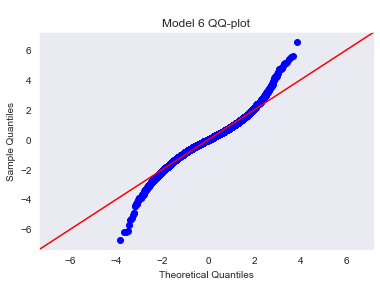

In [145]:
qqplot(model_nbr=6, model=model_6)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=6, model=model_6)

### K-folds

### Model 6 Evaluation

## Model 7  + Normalize

### Strategy

**Model 7 Approach**
- Start with Model 5 baseline
- Add price per square foot decile engineered from zipcode medians
    
    

In [146]:
# Model 4 Setup and call statsmodel function
features_m7 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt']
X_train_m7 = X_train[features_m7].apply(normalize)
y_train_m7 = y_train['price_log']
X_train_m7.head()

,sqft_living_log,grade,view,sqft_per_bedroom_log,renovation_ind,waterfront,basement_ind,condition,miles_fr_seattle_sqrt
6243,-0.65882729,-0.56079704,-0.30272758,-1.50583829,-0.18786936,-0.08327991,-0.79135728,0.90294258,-1.42953230
8986,-0.67526118,-0.56079704,2.30896866,-0.63759039,-0.18786936,-0.08327991,1.26357859,0.90294258,2.00270340
9419,1.16455083,1.15001519,-0.30272758,0.88564174,-0.18786936,-0.08327991,-0.79135728,-0.63030256,0.32412920
10155,0.18557589,-0.56079704,-0.30272758,-0.39834812,-0.18786936,-0.08327991,1.26357859,-0.63030256,0.09955341
10436,0.64209789,-0.56079704,-0.30272758,1.09021246,-0.18786936,-0.08327991,1.26357859,2.43618773,-1.00466075


### Run OLS

In [147]:
model_7 = calc_sm_ols(model_nbr=7, X=X_train_m7, y=y_train_m7)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4035.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:30:29   Log-Likelihood:                -3682.2
No. Observations:               17276   AIC:                             7384.
Df Residuals:                   17266   BIC:                             7462.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.04

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

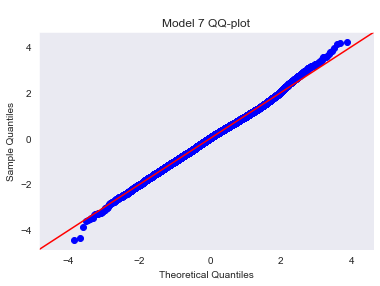

In [148]:
qqplot(model_nbr=7, model=model_7)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=7, model=model_7)

### K-folds

### Model 7 Evaluation

## Model 8 + PSF Decile

### Strategy

**Model 8 Approach**
- Start with Model 5 baseline
- Add Price Per Sqft Decile:
    - Round 1: Initial feature had r2 0.96 and MAE at \\$41K, but residuals had pattern with deciles 1/10 skewed and deciles 2-8 declining from positive to negative.
    - Round 2:
    

In [149]:
# Model 8 Setup and call statsmodel function
features_m8 = ['sqft_living_log','grade','view','sqft_per_bedroom_log','renovation_ind','waterfront','basement_ind','condition','miles_fr_seattle_sqrt','zip_psf_median_box']
X_train_m8 = X_train[features_m8] 
y_train_m8 = y_train['price_log']
X_train_m8.head()

,sqft_living_log,grade,view,sqft_per_bedroom_log,renovation_ind,waterfront,basement_ind,condition,miles_fr_seattle_sqrt,zip_psf_median_box
6243,7.27239839,7.00000000,0.00000000,5.88610403,0.00000000,0.00000000,0.00000000,4.00000000,1.83478680,4.59000241
8986,7.26542972,7.00000000,2.00000000,6.16681743,0.00000000,0.00000000,1.00000000,4.00000000,5.23596768,4.35340191
9419,8.04558828,9.00000000,0.00000000,6.65929392,0.00000000,0.00000000,0.00000000,3.00000000,3.57258119,4.48146811
10155,7.63046126,7.00000000,0.00000000,6.24416690,0.00000000,0.00000000,1.00000000,3.00000000,3.35003736,4.48303042
10436,7.82404601,7.00000000,0.00000000,6.72543372,0.00000000,0.00000000,1.00000000,5.00000000,2.25581412,4.69956287


### Run OLS

In [150]:
model_8 = calc_sm_ols(model_nbr=8, X=X_train_m8, y=y_train_m8)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     5050.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:30:43   Log-Likelihood:                -1653.3
No. Observations:               17276   AIC:                             3329.
Df Residuals:                   17265   BIC:                             3414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.31

**Model Summary Interpretation**
- Adj r^2 = 0.628 | would be good if all else checks
- P-value = 0.00 | would be good if all else checks
- Skew = 2 (tgt ~0), Kurtosis = 18+ (tgt 3), JB = 191K (tgt 0-6) | Indicates major non-normality, not good
- Cond. No. 159K | indicates strong multicollinearity (ill-conditioned)
- Predictors:
    - Intercept: \\$189K might be reasonable to represent base land value
    - Sqft_Living: \\$180/sqft average doesn't see unreasonable for Seattle area, low p-value 0.00
    - Sqft_above: negative coefficient of \\$69 doesn't make sense. Somethings off with variable ranges or multicollinearity
    - Bathrooms: negative coefficient of \\$2K doesn't make sense. Also p-value of 0.56 when this showed one of highest correlations
    - View: p-value of 0.00. These seem to make sense adding \\$88K (view 2) to \\$494K (view 4)
    - Grade: Below/average (<7) has negative coeff versus lowest Grade 3 and high p-values. Coefficients on above average grades make sense but p-values split.

### QQ-plot

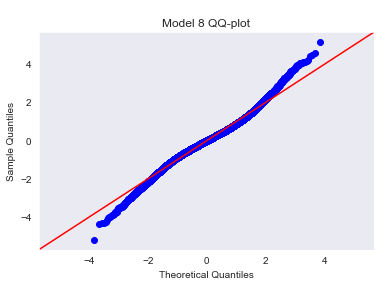

In [151]:
qqplot(model_nbr=8, model=model_8)

**QQ-Plot Interpretation**
- This is WAY off, showing major outliers on both ends. Back to the drawing board.

### Plot Residuals

**Notes on Residuals**

In [ ]:
# qqplot(model_nbr=1, model=model_1)
plot_residuals(model_nbr=8, model=model_8)

### K-folds

### Model 8 Evaluation

# Business Analysis

# Deployment

# Appendix